# Quantifying Interlingua Across Models

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Encode dataset with models

In [6]:
# !python encode_dataset_with_models.py {'xlmr'}

# Do measurements

In [ ]:
# !python run_analysis.py mT5 acc
# !python run_analysis.py mT5 cka
# !python run_analysis.py mT5 acc-cent
# !python run_analysis.py mT5 acc-procrustes

# Plot

In [2]:
import pickle
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

xlmr
cka
acc
acc-cent
acc-procrustes


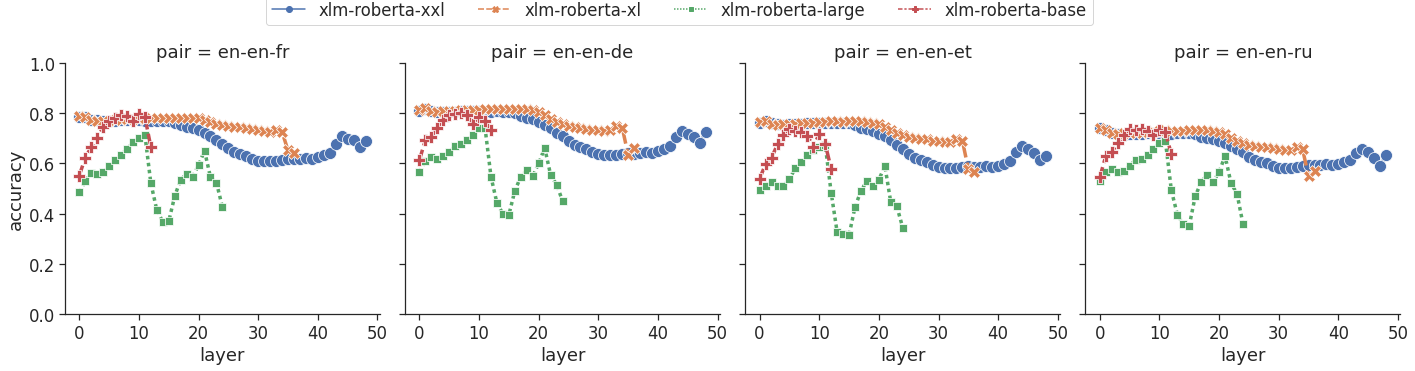

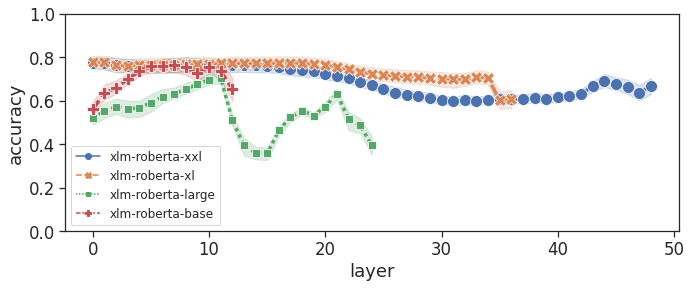

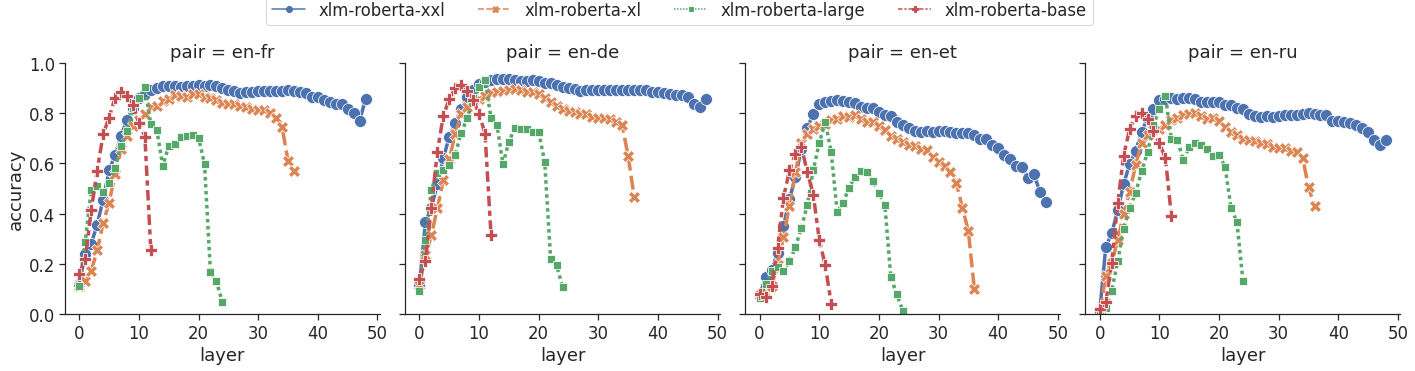

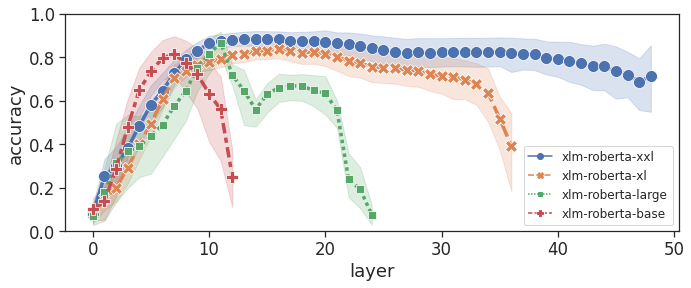

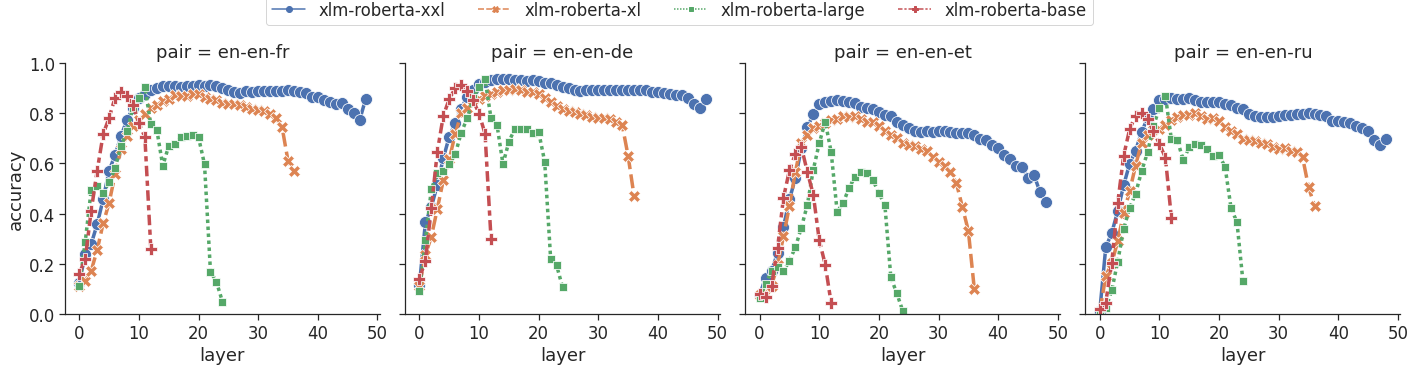

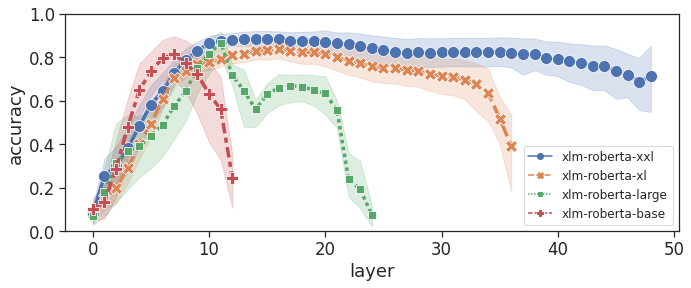

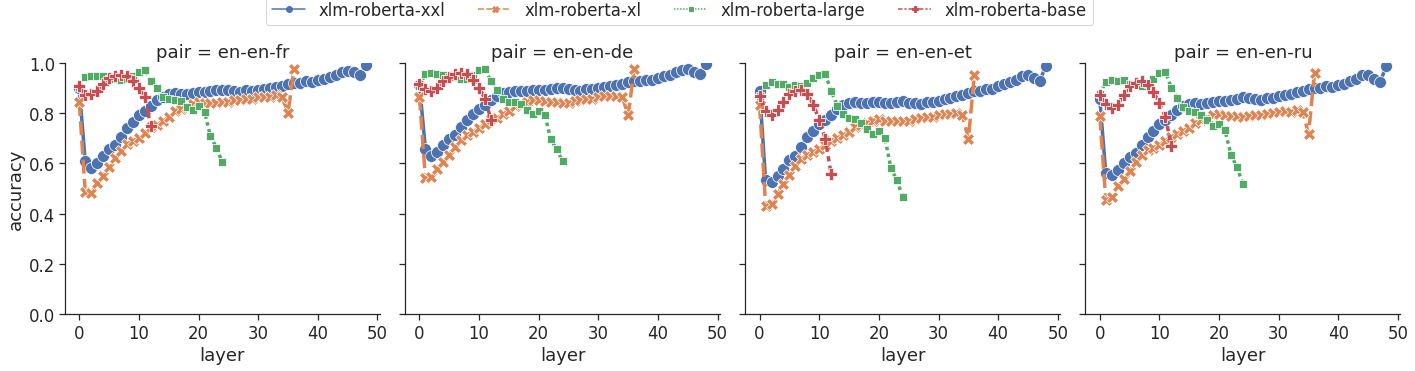

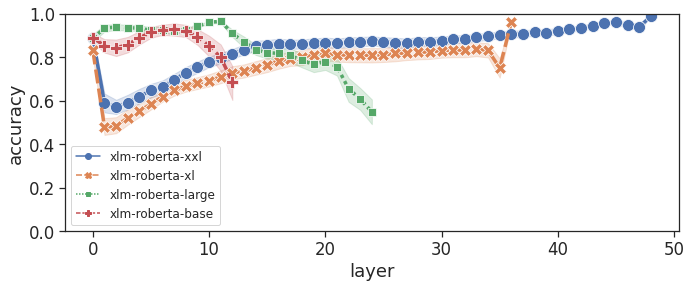

In [3]:
# ACCURACY
model_class = "xlmr"
print(model_class)
for task in ["cka", "acc", "acc-cent", "acc-procrustes"]:
    print(task)
    
    scores_dfs = pickle.load(open(f"../experiments/encoded_datasets/xnli/{model_class}-{task}-all_models.pkl", 'rb'))

    scores_dfs = {k: pd.DataFrame(dict(v)).melt(var_name="lang", value_name="accuracy", ignore_index=False) for k, v in scores_dfs.items()}

    for k, v in scores_dfs.items():
        scores_dfs[k]['layer'] = v.index
        scores_dfs[k]['model'] = k.split('/')[-1]

    scores_dfs = pd.concat(scores_dfs, axis=0, ignore_index=True)


    sns.set(font_scale=1.5) 
    sns.set_style("ticks")

    scores_dfs.rename(columns = {'lang':'pair'}, inplace = True)

    scores_dfs['pair'] = [f"en-{p}" for p in scores_dfs['pair']] 

    g = sns.relplot(data=scores_dfs, 
                x="layer", 
                y="accuracy", 
                hue="model", 
                style="model", 
                markers=True, 
                col="pair", 
                kind="line", 
                linewidth=3.5,
                markersize=12,
                facet_kws={"legend_out": True})


    plt.ylim(0,1)


    g._legend.remove()
    g.figure.legend(ncol=4).set_bbox_to_anchor([0.67, 1.07])


    plt.savefig(f"../assets/figures/{model_class}-{task}-four_langs.pdf", dpi=300,  bbox_inches='tight')

    fig, ax = plt.subplots(figsize=(11, 4))

    g = sns.lineplot(data=scores_dfs, 
                x="layer", 
                y="accuracy", 
                hue="model", 
                style="model", 
                markers=True, 
                #kind="line", 
                linewidth=3.5,
                markersize=12,
                ax=ax)


    plt.ylim(0,1)

    lgd = plt.legend(prop={'size': 12})

    g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

    
    
#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs, 
#                 x="layer", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.xticks(range(49))
#     ax.tick_params(axis='x', rotation=45, labelsize=9)
#     plt.ylim(0,1)
#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-xticks.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')



#     scores_dfs_rel = scores_dfs.copy()

#     for hf_model_id in hf_model_ids:
#         mid = hf_model_id.split('/')[-1]
#         num_layers = scores_dfs_rel[scores_dfs_rel['model'] == mid]['layer'].max()
#         scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] = scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] / num_layers
#     scores_dfs_rel.rename(columns={"layer": "network depth"}, inplace=True)

#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs_rel, 
#                 x="network depth", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.ylim(0,1)

#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-rel.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
